In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


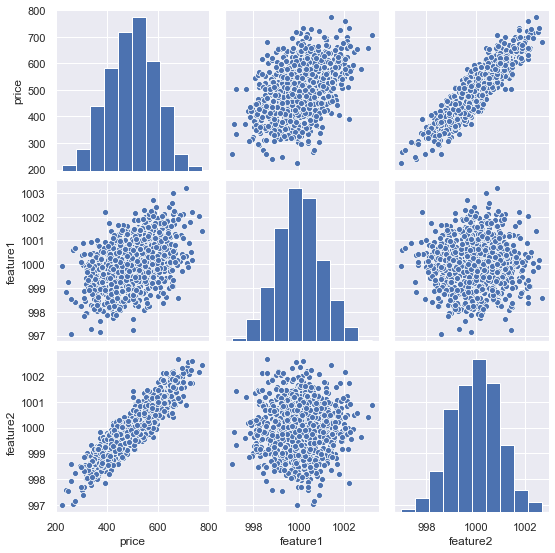

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_train.max()

1.0

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [19]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256637.3760
Epoch 2/250
700/700 [==============================] - 0s 36us/sample - loss: 256503.5916
Epoch 3/250
700/700 [==============================] - 0s 36us/sample - loss: 256327.5952
Epoch 4/250
700/700 [==============================] - 0s 34us/sample - loss: 256047.4705
Epoch 5/250
700/700 [==============================] - 0s 38us/sample - loss: 255733.8945
Epoch 6/250
700/700 [==============================] - 0s 46us/sample - loss: 255384.6119
Epoch 7/250
700/700 [==============================] - 0s 43us/sample - loss: 254995.4002
Epoch 8/250
700/700 [==============================] - 0s 36us/sample - loss: 254576.8019
Epoch 9/250
700/700 [==============================] - 0s 48us/sample - loss: 254122.5362
Epoch 10/250
700/700 [==============================] - 0s 38us/sample - loss: 253621.8707
Epoch 11/250
700/700 [==============================] - 0s 36us/sample - loss: 

700/700 [==============================] - 0s 38us/sample - loss: 25.4745
Epoch 184/250
700/700 [==============================] - 0s 36us/sample - loss: 25.1800
Epoch 185/250
700/700 [==============================] - 0s 40us/sample - loss: 24.9981
Epoch 186/250
700/700 [==============================] - 0s 40us/sample - loss: 24.8759
Epoch 187/250
700/700 [==============================] - 0s 34us/sample - loss: 25.1604
Epoch 188/250
700/700 [==============================] - 0s 36us/sample - loss: 24.7065
Epoch 189/250
700/700 [==============================] - 0s 37us/sample - loss: 24.7021
Epoch 190/250
700/700 [==============================] - 0s 37us/sample - loss: 24.4844
Epoch 191/250
700/700 [==============================] - 0s 43us/sample - loss: 24.5046
Epoch 192/250
700/700 [==============================] - 0s 43us/sample - loss: 24.7839
Epoch 193/250
700/700 [==============================] - 0s 47us/sample - loss: 24.3393
Epoch 194/250
700/700 [=======================

In [21]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

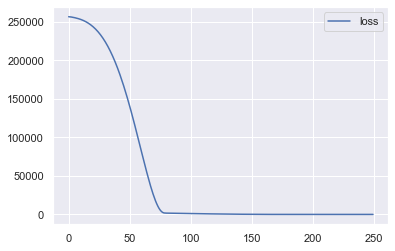

In [22]:
loss_df.plot()

In [23]:
model.evaluate(X_test,y_test,verbose=0)

25.62439432779948

In [24]:
model.evaluate(X_train,y_train,verbose=0)

23.86287190028599

In [25]:
predict = model.predict(X_test)

In [50]:
predict = pd.Series(predict.reshape(300,))

In [51]:
pred_df = pd.DataFrame(y_test)

In [52]:
pred_df = pd.concat([pred_df,predict],axis=1)

In [54]:
pred_df.columns = ['True y','Predctions']

In [55]:
pred_df

,True y,Predctions
0,402.296319,405.815460
1,624.156198,624.313538
2,582.455066,593.005310
3,578.588606,573.043335
4,371.224104,367.068512
...,...,...
295,525.704657,529.903992
296,502.909473,516.125793
297,612.727910,610.471252
298,417.569725,417.498566


<AxesSubplot:xlabel='True y', ylabel='Predctions'>

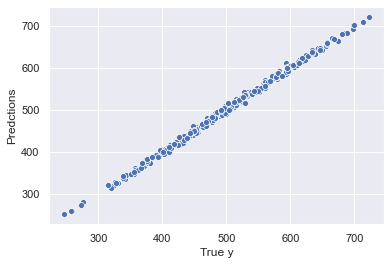

In [56]:
sns.scatterplot(x='True y',y='Predctions',data=pred_df)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_absolute_error(pred_df['True y'],pred_df['Predctions'])

4.091784444293655

In [60]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [61]:
mean_squared_error(pred_df['True y'],pred_df['Predctions'])**0.5

5.075227313978488

In [62]:
nem_gem = [[998,1000]]

In [63]:
nem_gem = scaler.transform(nem_gem)

In [64]:
model.predict(nem_gem)

array([[420.27454]], dtype=float32)

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model.save('my_gem_model.h5')

In [67]:
later_model = load_model('my_gem_model.h5')

In [68]:
later_model.predict(nem_gem)

array([[420.27454]], dtype=float32)